<a href="https://colab.research.google.com/github/Mzulhilmi93/data-analytics/blob/main/Part_5_0_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON PRIMER Part 5.0 Unsupervised Learning 


1.   K-means Clustering
2.   Principal Component Analysis<br>
   Logistic Regression Classification without PCA <br>
   Logistic Regression Classification with PCA <br>





## About the instructor: 
    
**Dr. Vijayakumar**

AIRASIA ACADEMY, 
    
vijaymmu@gmail.com

## K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np

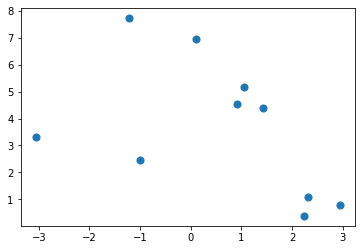

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=10, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

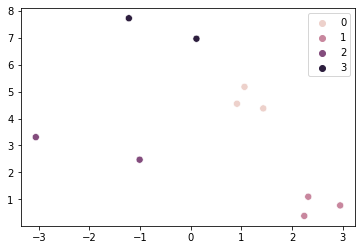

In [3]:
import seaborn as sns
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=50, hue=y_true);

In [4]:
print(X)

[[ 0.91433877  4.55014643]
 [ 2.24310814  0.38520622]
 [ 2.32158546  1.09786826]
 [ 1.43289271  4.37679234]
 [-1.22080066  7.72314971]
 [-1.00824229  2.47258325]
 [ 1.06269622  5.17635143]
 [ 2.95171497  0.7745687 ]
 [ 0.113597    6.96284061]
 [-3.0586979   3.31005342]]


In [5]:
X.shape

(10, 2)

In [6]:
y_true.shape

(10,)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

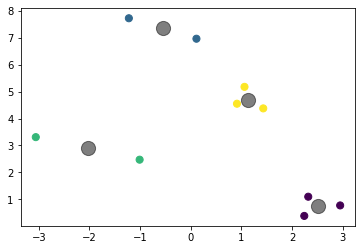

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Examples:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = clusters == i
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
np.zeros_like(clusters)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
mask = clusters == 1
print("which images are clustered into cluster 1?") 
print(mask)
print("")
print("What is the length of mask? ")
print(len(mask))
print("")
print("How many images are clustered into cluster 1?")
print(mask.sum())

which images are clustered into cluster 1?
[False False False ... False False False]

What is the length of mask? 
1797

How many images are clustered into cluster 1?
176


In [ ]:
print("Among the images that are clustered into cluster 1, what is the most possible digit?")
print("")
print(mode(digits.target[mask])[0])

Among the images that are clustered into cluster 1, what is the most possible digit?

[3]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

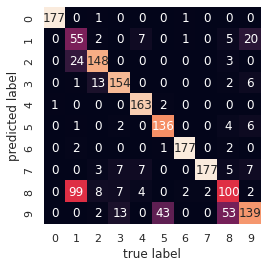

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# KMeans Clustering Exercise
Download the dataset [mall_customer.csv](https://drive.google.com/file/d/1T5k0zkV8fF7-AgzY-vaqIcS6cJCdEcBc/view?usp=sharing) and perform a KMeans clustering.

In [9]:
file = "/content/mall_customer.csv"

import pandas as pd
df = pd.read_csv(file)

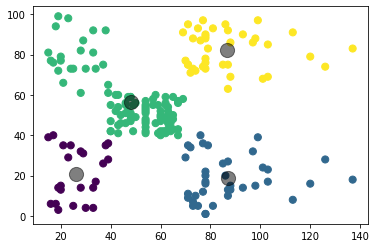

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X['Annual_Income_(k$)'], X['Spending_Score'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

In [14]:
df.shape

(200, 5)

In [15]:
df.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]>

In [10]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
features = ['Annual_Income_(k$)', 'Spending_Score']
X = df[features]

In [12]:
X.head(5)

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


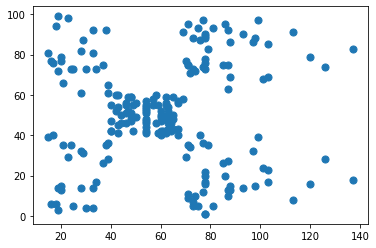

In [16]:
plt.scatter(X['Annual_Income_(k$)'], X['Spending_Score'],s=50, cmap='viridis');

## Principal Component Analysis

Prior to doing this practical, please download the [wine.csv](https://drive.google.com/file/d/1TTOhlohQlndXDErVB-BrV1xcdrzMgM-G/view?usp=sharing) dataset. Upload this dataset to current working environment. 

<br><br>
**As there are more than one thousand features, can we reduce some "less important" features?**

In [ ]:
# Write your codes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_defect = pd.read_csv('wine.csv')

In [ ]:
df_defect.shape

(178, 14)

In [ ]:
df_defect.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X = df_defect.drop(['Wine'], axis=1)
y = df_defect['Wine']

print(X.shape, y.shape)

(178, 13) (178,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Note: Do `train_test_split()` before applying `MinMaxScaler()` or `StandardScaler()`

### Determine the number of PCs

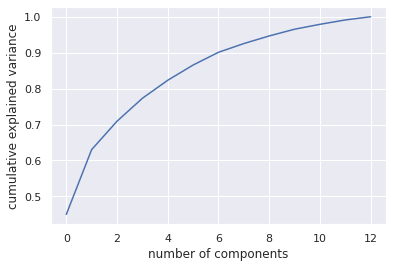

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

accum_explained_var = np.cumsum(pca.explained_variance_ratio_)

min_threshold = np.argmax(accum_explained_var > 0.90) # use 90%

In [ ]:
min_threshold

6

In [ ]:
pca = PCA(n_components = min_threshold + 1)

X_train_projected= pca.fit_transform(X_train)
X_test_projected = pca.transform(X_test)

X_train_projected.shape

(142, 7)

### Logistic Regression Classification without PCA

In [ ]:
# Train the model

# Train the model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

# without reduction
logregwithoutpca = LogisticRegression()
logregwithoutpca.fit(X_train, y_train)

logregwithoutpca_result = logregwithoutpca.predict(X_test)

print('Accuracy of Logistic Regression (without PCA) on training set: {:.2f}'
     .format(logregwithoutpca.score(X_train, y_train)))
print('Accuracy of Logistic Regression (without PCA)  on testing set: {:.2f}'
     .format(logregwithoutpca.score(X_test, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithoutpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithoutpca_result))


Accuracy of Logistic Regression (without PCA) on training set: 0.99
Accuracy of Logistic Regression (without PCA)  on testing set: 1.00

Confusion matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Logistic Regression Classification with PCA

In [ ]:
logregwithpca = LogisticRegression()
logregwithpca.fit(X_train_projected, y_train)

logregwithpca_result = logregwithpca.predict(X_test_projected)

print('Accuracy of Logistic Regression (with PCA) on training set: {:.2f}'
     .format(logregwithpca.score(X_train_projected, y_train)))
print('Accuracy of Logistic Regression (with PCA) on testing set: {:.2f}'
     .format(logregwithpca.score(X_test_projected, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithpca_result))

Accuracy of Logistic Regression (with PCA) on training set: 0.99
Accuracy of Logistic Regression (with PCA) on testing set: 1.00

Confusion matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

